In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

**Step 1: Load and Inspect the Dataset**


In [2]:
# Load dataset
df = pd.read_csv('/content/NESTLEIND.csv')

In [3]:
# Display first few rows
print(df.head())

         Date     Symbol Series  Prev Close     Open    High      Low    Last  \
0  2010-01-08  NESTLEIND     EQ     2512.95  2555.00  2575.0  2475.20  2476.0   
1  2010-01-11  NESTLEIND     EQ     2494.65  2401.00  2515.0  2400.00  2500.0   
2  2010-01-12  NESTLEIND     EQ     2498.95  2540.00  2540.0  2471.35  2505.0   
3  2010-01-13  NESTLEIND     EQ     2502.85  2502.85  2540.0  2480.00  2489.8   
4  2010-01-14  NESTLEIND     EQ     2489.35  2535.00  2595.0  2470.00  2560.0   

     Close     VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  2494.65  2529.81     648  1.639316e+11     NaN                 438   
1  2498.95  2494.44     825  2.057909e+11     NaN                 638   
2  2502.85  2485.22   68346  1.698549e+13     NaN               67695   
3  2489.35  2491.94    1032  2.571682e+11     NaN                 718   
4  2568.20  2510.27  330361  8.292956e+13     NaN              329193   

   %Deliverble  
0       0.6759  
1       0.7733  
2       0.9905  
3     

In [4]:
# Display basic statistics
print(df.describe())

         Prev Close          Open          High           Low          Last  \
count   2806.000000   2806.000000   2806.000000   2806.000000   2806.000000   
mean    7507.122933   7518.226960   7604.765289   7425.280114   7511.272024   
std     4180.468727   4189.232067   4234.100796   4133.100645   4182.250852   
min     2489.350000   2295.000000   2515.000000   2295.000000   2476.000000   
25%     4641.150000   4650.000000   4700.012500   4600.000000   4642.250000   
50%     6120.975000   6118.275000   6200.000000   6036.000000   6117.050000   
75%     9678.700000   9697.500000   9798.500000   9569.687500   9681.512500   
max    18732.700000  18844.000000  18844.000000  18520.000000  18720.000000   

              Close          VWAP        Volume      Turnover         Trades  \
count   2806.000000   2806.000000  2.806000e+03  2.806000e+03    2456.000000   
mean    7512.039647   7514.318959  5.449900e+04  5.493844e+13   11043.311075   
std     4182.705331   4182.857682  6.925583e+04 

In [5]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2806 non-null   object 
 1   Symbol              2806 non-null   object 
 2   Series              2806 non-null   object 
 3   Prev Close          2806 non-null   float64
 4   Open                2806 non-null   float64
 5   High                2806 non-null   float64
 6   Low                 2806 non-null   float64
 7   Last                2806 non-null   float64
 8   Close               2806 non-null   float64
 9   VWAP                2806 non-null   float64
 10  Volume              2806 non-null   int64  
 11  Turnover            2806 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  2806 non-null   int64  
 14  %Deliverble         2806 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 329.0

In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2801,2021-04-26,NESTLEIND,EQ,16625.70,16799.05,16895.0,16663.65,16865.30,16870.60,16811.15,152362,2.561380e+14,14294.0,117593,0.7718
2802,2021-04-27,NESTLEIND,EQ,16870.60,16899.00,16930.0,16750.00,16791.00,16779.00,16808.88,44651,7.505333e+13,14171.0,21944,0.4915
2803,2021-04-28,NESTLEIND,EQ,16779.00,16775.00,16831.1,16611.00,16616.05,16633.80,16681.89,86876,1.449256e+14,18998.0,54382,0.6260
2804,2021-04-29,NESTLEIND,EQ,16633.80,16679.00,16714.6,16480.00,16510.00,16502.55,16545.14,80207,1.327036e+14,19768.0,40477,0.5047
2805,2021-04-30,NESTLEIND,EQ,16502.55,16500.00,16569.2,16255.00,16320.20,16309.25,16375.64,97783,1.601259e+14,24063.0,54977,0.5622


In [8]:
df.shape

(2806, 15)

**Step 2: Exploratory Data Analysis (EDA)**

In [9]:
# Check for missing values
print(df.isnull().sum())

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                350
Deliverable Volume      0
%Deliverble             0
dtype: int64


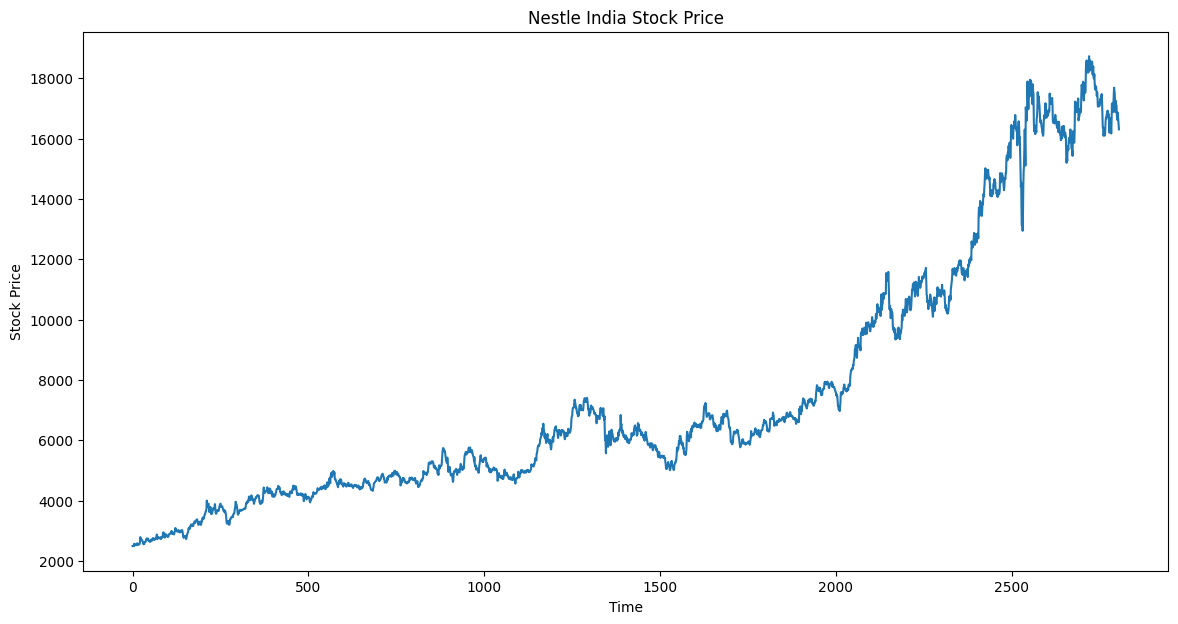

In [10]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Nestle India Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [11]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

<ipython-input-11-b7439de27397>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [12]:
from sklearn.preprocessing import StandardScaler
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

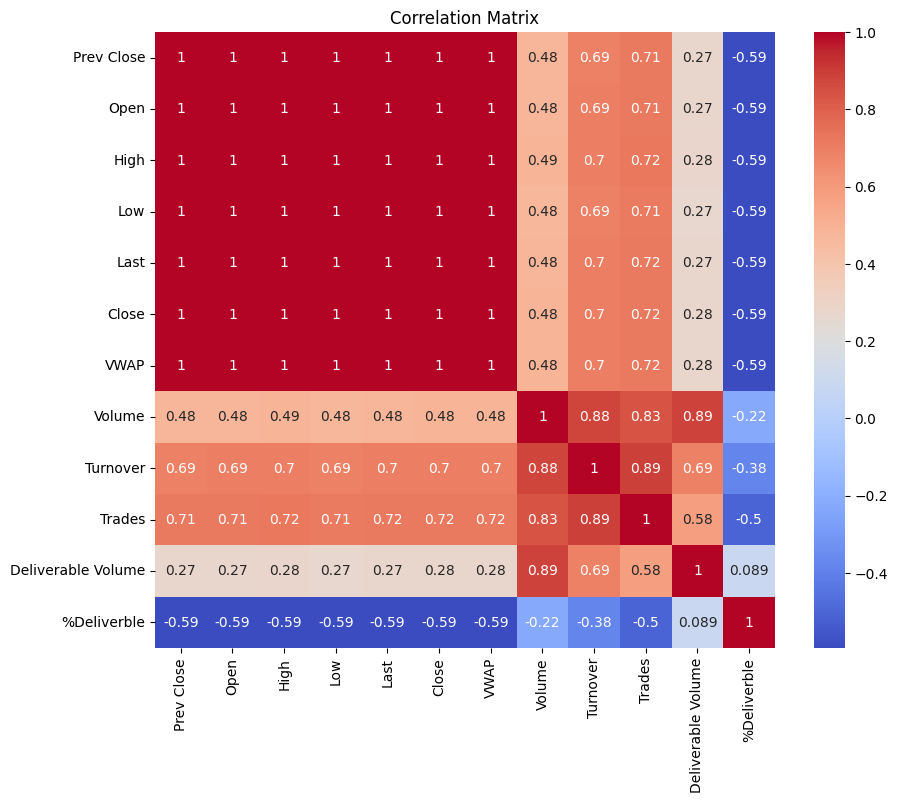

In [13]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

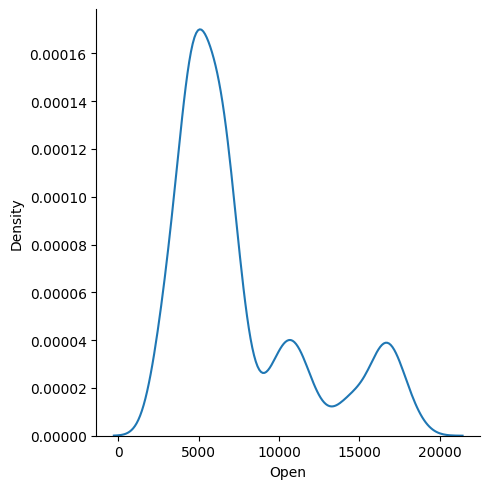

In [14]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Prev Close', ylabel='High'>

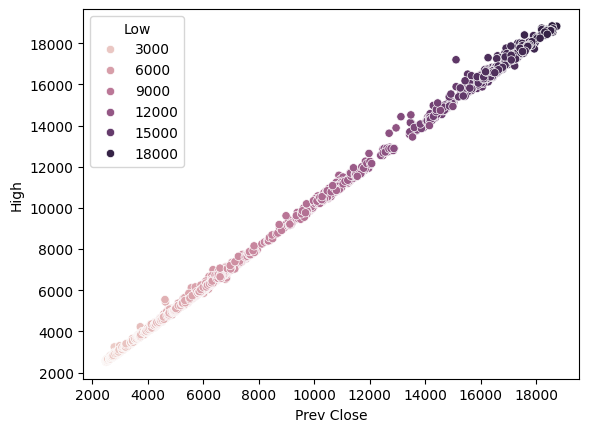

In [15]:
# About The Adj Close , High and low Stock prices
sns.scatterplot(x="Prev Close",y="High",hue="Low",data=df)

array([[<Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>],
       [<Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>,
        <Axes: title={'center': '%Deliverble'}>]], dtype=object)

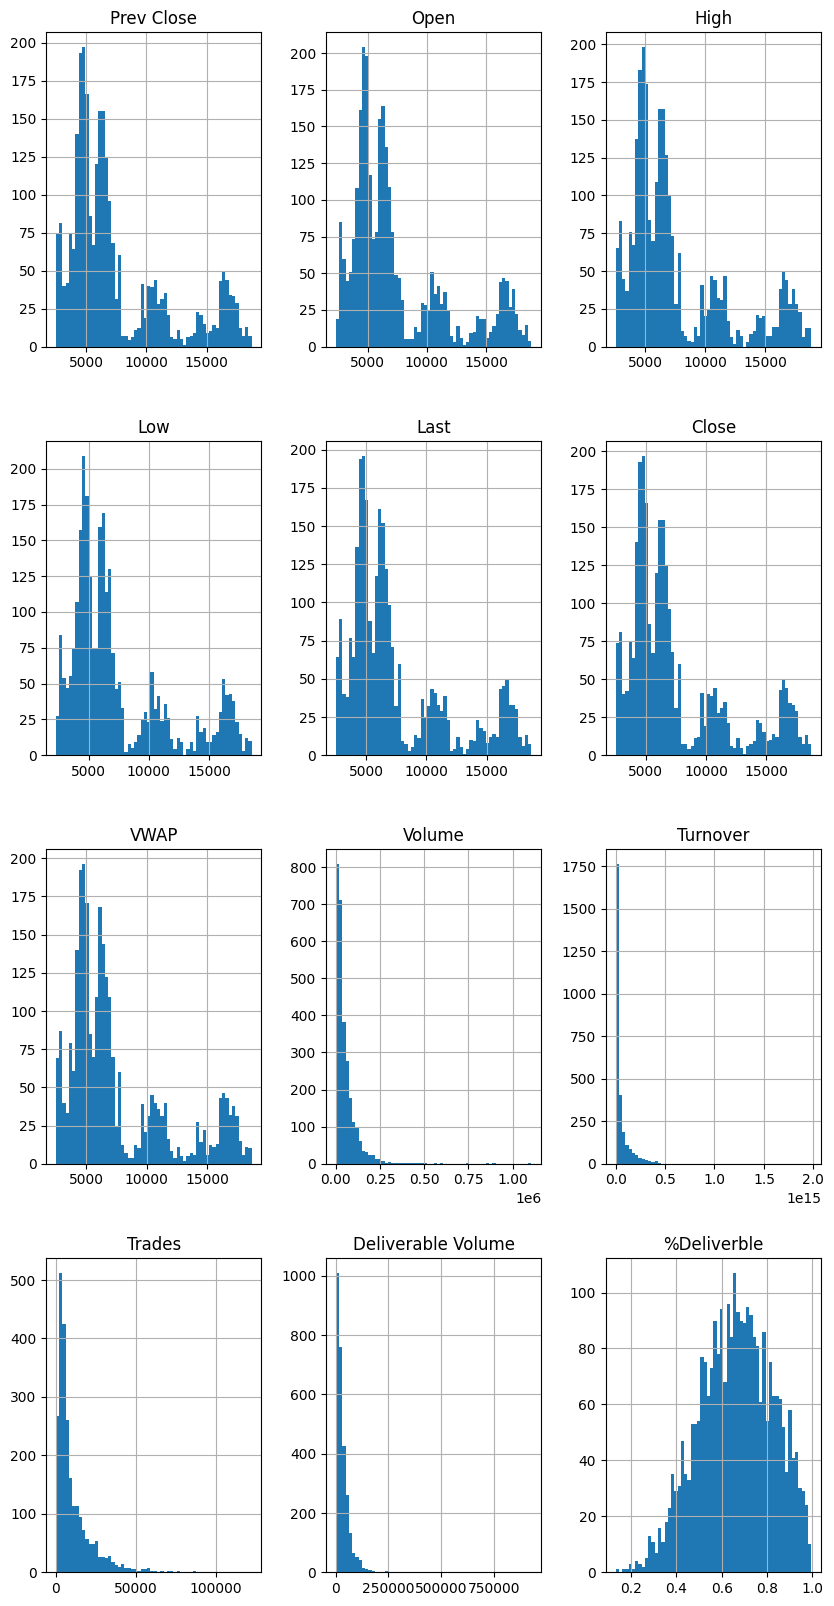

In [16]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

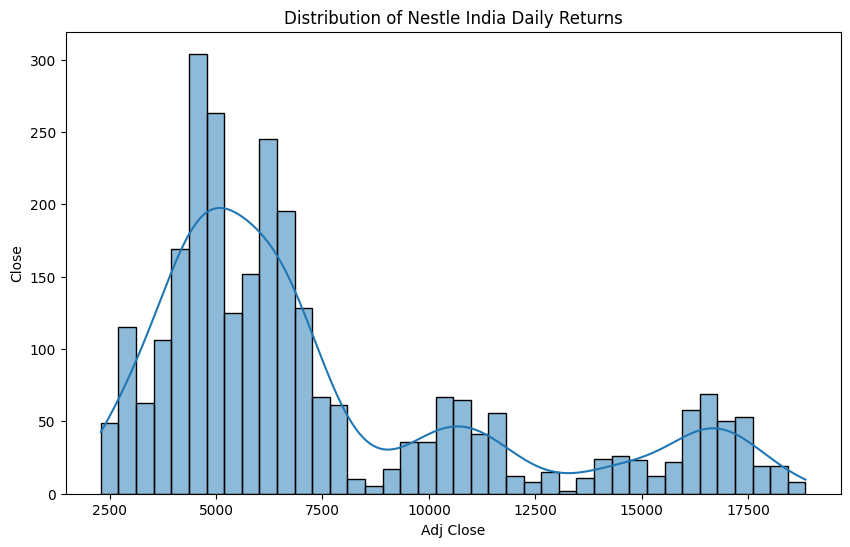

In [17]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of Nestle India Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

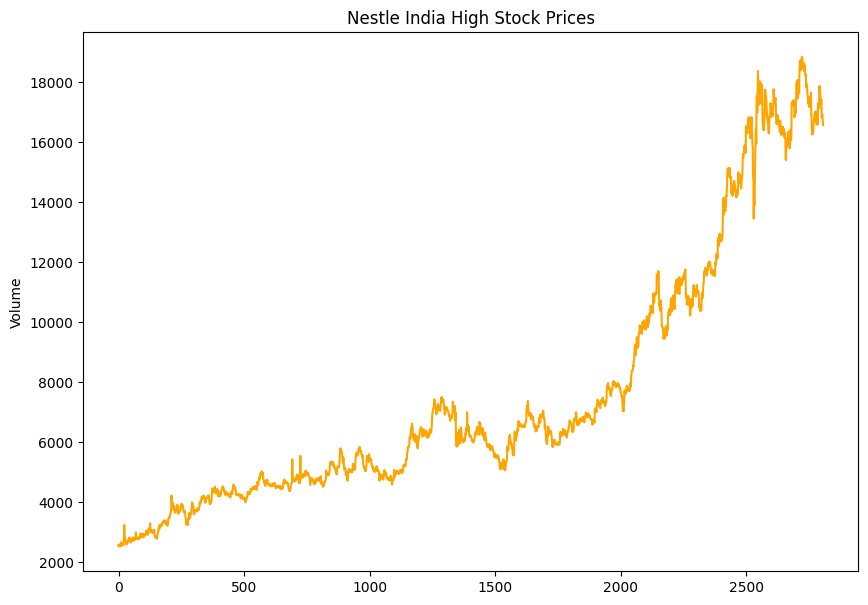

In [18]:
# Plot Nestle India High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='Nestle India '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

volume_analysis(df,'High')

In [19]:
import tensorflow as tf
print(tf.__version__)

2.17.0


**Step 3: Data Preprocessing, split the dataset into training and testing sets**

In [20]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Feature selection
data = df[['Date', 'Close']].copy()

In [21]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [22]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)].Close.values
        y = data.iloc[i+seq_length].Close
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 60
X, y = create_sequences(data, SEQ_LENGTH)

In [23]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [24]:
# Reshape for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

**Step 4: Comparing and Predicting with differnt Models**



**LSTM Model**

In [25]:
# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Train the model
history = model_lstm.fit(X_train_lstm, y_train, batch_size=1, epochs=1)

2196/2196 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - loss: 7.4542e-04


In [28]:
# Predict
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [29]:
# Evaluate
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

In [30]:
print('LSTM RMSE:', rmse_lstm)
print('LSTM R2 Score:', r2_lstm)

LSTM RMSE: 407.016788248518
LSTM R2 Score: 0.9727124620090067


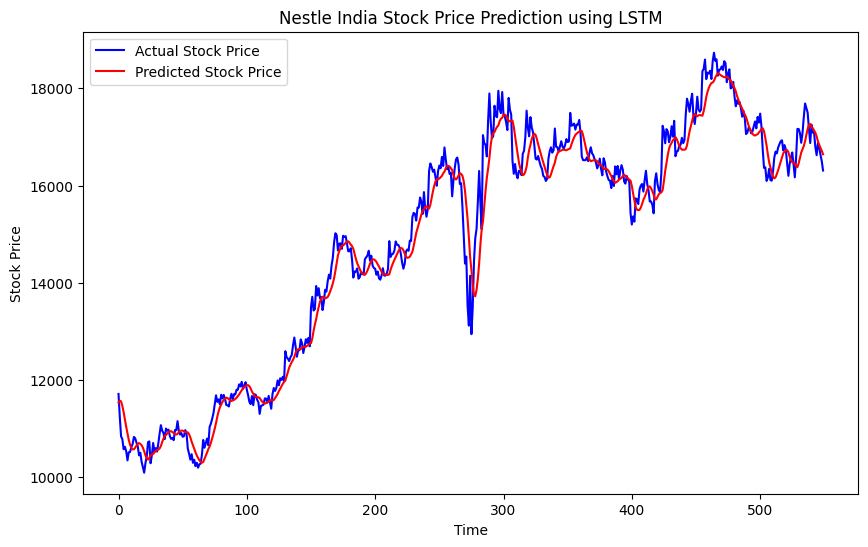

In [31]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(y_test_lstm, color='blue', label='Actual Stock Price')
plt.plot(y_pred_lstm, color='red', label='Predicted Stock Price')
plt.title('Nestle India Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Linear Regression Model**

In [32]:
# Reshape for Linear Regression
X_train_lr = X_train.reshape(X_train.shape[0], -1)
X_test_lr = X_test.reshape(X_test.shape[0], -1)

# Train Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train)

LinearRegression()

In [33]:
# Predict
y_pred_lr = model_lr.predict(X_test_lr)
y_pred_lr = scaler.inverse_transform(y_pred_lr.reshape(-1, 1))
y_test_lr = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))
r2_lr = r2_score(y_test_lr, y_pred_lr)

In [34]:
print('Linear Regression RMSE:', rmse_lr)
print('Linear Regression R2 Score:', r2_lr)

Linear Regression RMSE: 270.2518644458053
Linear Regression R2 Score: 0.9879696820628348


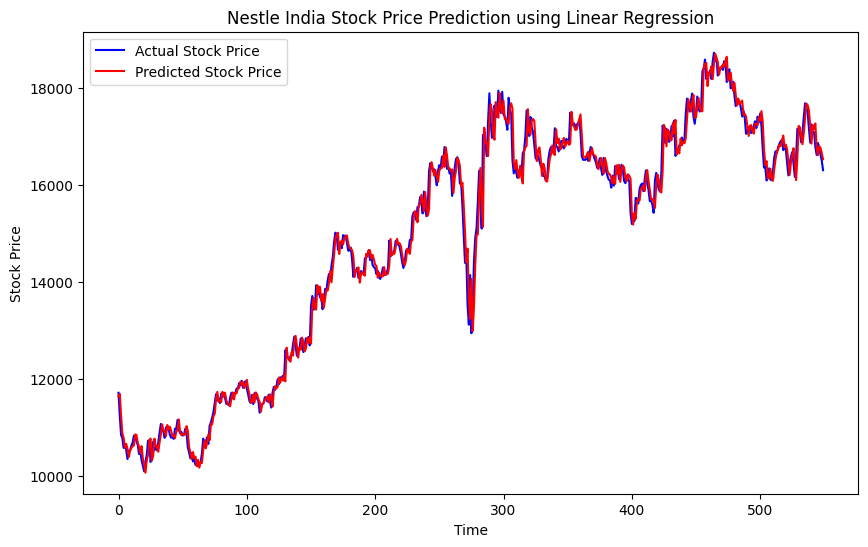

In [35]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(y_test_lr, color='blue', label='Actual Stock Price')
plt.plot(y_pred_lr, color='red', label='Predicted Stock Price')
plt.title('Nestle India Stock Price Prediction using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**KNN Model**

In [36]:
# Train KNN model
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_lr, y_train)

# Predict
y_pred_knn = model_knn.predict(X_test_lr)
y_pred_knn = scaler.inverse_transform(y_pred_knn.reshape(-1, 1))
y_test_knn = scaler.inverse_transform(y_test.reshape(-1, 1))

In [37]:
# Evaluate
rmse_knn = np.sqrt(mean_squared_error(y_test_knn, y_pred_knn))
r2_knn = r2_score(y_test_knn, y_pred_knn)

print('KNN RMSE:', rmse_knn)
print('KNN R2 Score:', r2_knn)

KNN RMSE: 4144.048814710538
KNN R2 Score: -1.8287165570742823


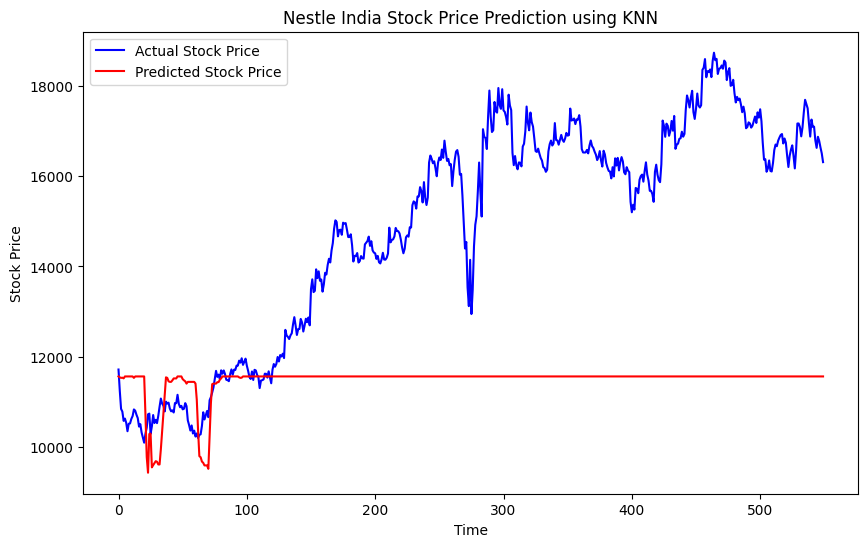

In [38]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(y_test_knn, color='blue', label='Actual Stock Price')
plt.plot(y_pred_knn, color='red', label='Predicted Stock Price')
plt.title('Nestle India Stock Price Prediction using KNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**K-Means Clustering**

In [39]:
# Feature extraction for clustering
features = df[['Close', 'Volume']]

# Normalize features
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(features)

In [40]:
# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_features)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


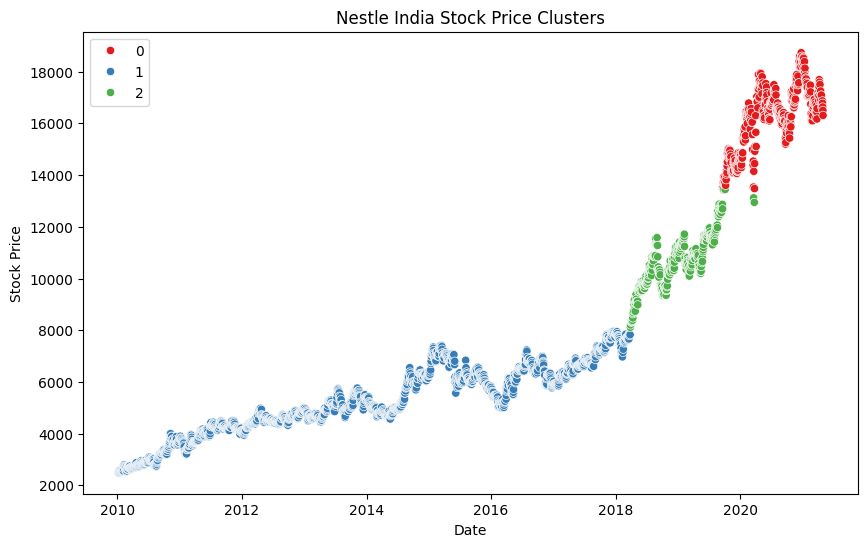

In [41]:
# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Date', y='Close', hue='Cluster', palette='Set1')
plt.title('Nestle India Stock Price Clusters')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()